# E. Practice - Data Visualization with Pandas and Matplotlib

In the previous sections, we talked about how you can visualize your data with pandas and matplotlib.  
Based on what we've learned, let's try to analyze real-world data by data visualization.

### _Objective_
- **Visualization on mortality rates of major causes of death**: Practicing data visualization on real-world data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np

# \[1. Visualizing the Mortality Rate by Major Cause of Death\]

#### Example Data) Crude death rate by cause of death
 * index: Cause of Death
 * column: Year
 * value: Crude Death Rate
 
> The crude death rate is the number of deaths occurring among the population of a given geographical area during a given year,  
per 1,000 mid-year total population of the given geographical area during the same year.<br>
(OECD, https://stats.oecd.org/glossary/detail.asp?ID=491)

In [2]:
df = pd.read_csv("./data/crude.csv", delimiter=',')
df.set_index(df['Causative'], drop=True, inplace=True)
df = df.iloc[:,1:]
df

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Causative,,,,,,,,,,
Entire,254.4,243.6,255.1,259.6,278.9,273.4,277.5,294.0,302.5,313.4
__Cancer disease__,139.5,140.5,144.4,142.8,146.5,149.0,150.9,150.8,153.0,153.9
cancer of the stomach,20.9,20.4,20.1,19.4,18.6,18.2,17.6,16.7,16.2,15.7
liver cancer,22.9,22.6,22.5,21.8,22.5,22.6,22.8,22.2,21.5,20.9
lung cancer,29.9,30.0,31.3,31.7,33.1,34.0,34.4,34.1,35.1,35.1
__Endocrine disease__,22.4,21.3,22.3,23.4,24.9,23.4,22.9,22.9,21.6,20.6
diabetes,20.7,19.6,20.7,21.5,23.0,21.5,20.7,20.7,19.2,17.9
__Circulatory disease__,112.3,109.2,112.5,113.5,117.1,113.1,113.9,116.9,118.1,119.6
hypertensive,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3


### (1) Line chart
#### The 10-year trend in crude mortality rate 

According to the example data above, the crude mortality rate is as follows.



|| 2008 | 2009 | 2010 | 2011 | 2012 | 2013 | 2014 | 2015 | 2016 | 2017 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
|Entire| 254.4|243.6|255.1|259.6|278.9|273.4|277.5|294.0|302.5|313.4|

In [3]:
df.T.Entire

2008    254.4
2009    243.6
2010    255.1
2011    259.6
2012    278.9
2013    273.4
2014    277.5
2015    294.0
2016    302.5
2017    313.4
Name: Entire, dtype: float64

Line charts would be the appropriate plot type to see trends over time.  
When drawing a line chart, you do not need to set anything as an argument in `.plot()`.

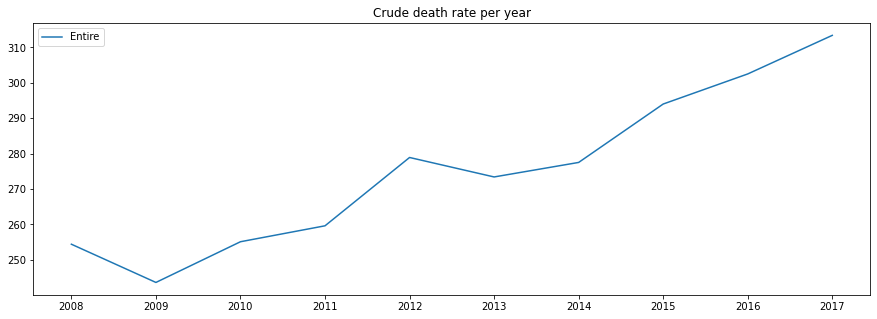

In [4]:
df.T.plot(y="Entire",
          title="Crude death rate per year",
          xticks=np.arange(len(df.columns)),
          figsize=(15,5))

df.T.index.name = "Year"
plt.show()

The line chart confirms that the crude mortality rate has increased consistently every year.

### (2) Bar chart
#### Identifying the cause of death that showed the biggest increase in the number of deaths in 2017 compared to 2008

Let's compare the mortality rate in 2017 compared to 2008 in order to understand which cause of death had a significant increase in the number of deaths.<Br>  
The changes in mortality are as follows.

In [5]:
diffs = (df["2017"]-df["2008"])/df["2008"] * 100 
diffs

Causative
Entire                      23.191824
__Cancer disease__          10.322581
cancer of the stomach      -24.880383
liver cancer                -8.733624
lung cancer                 17.391304
__Endocrine disease__       -8.035714
diabetes                   -13.526570
__Circulatory disease__      6.500445
hypertensive                17.708333
heart                       38.709677
cerebrovascular            -21.415929
__Respiratory disease__     96.604938
pneumonia                  240.540541
chronic dysplasia          -11.409396
__Digestive disease__        8.715596
liver                       -8.275862
dtype: float64

Create a new DataFrame for the crude mortality rate in 2008 and 2017 as well as the rate of change.

In [6]:
df_0817 = df.loc[:,['2008', '2017']]
df_0817['increase(%)'] = diffs
df_0817

Year,2008,2017,increase(%)
Causative,,,
Entire,254.4,313.4,23.191824
__Cancer disease__,139.5,153.9,10.322581
cancer of the stomach,20.9,15.7,-24.880383
liver cancer,22.9,20.9,-8.733624
lung cancer,29.9,35.1,17.391304
__Endocrine disease__,22.4,20.6,-8.035714
diabetes,20.7,17.9,-13.526570
__Circulatory disease__,112.3,119.6,6.500445
hypertensive,9.6,11.3,17.708333


A bar chart is useful when comparing the size of each item's value, such as comparing the rate of change.  
You can draw bars on your data by passing `kind="bar"` to `.plot()`.

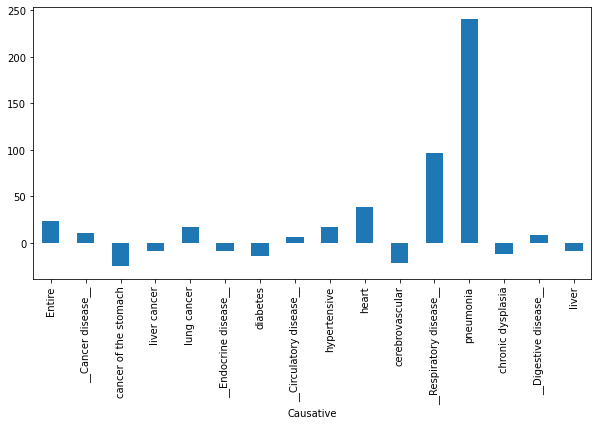

In [7]:
plt.figure(figsize=(10,5))
diffs.plot(kind='bar')
plt.show()

While the number of deaths from stomach cancer decreased by approx. 25%,  
respiratory diseases (respiratory disease&pneumonia combined) skyrocketed over 10 years.

### (3) Pie chart
#### Rate of change in the number of death from circulatory diseases in 2017 compared to 2008 

Let's take the data on the crude mortality rate of circulatory diseases.

In [8]:
cardiovascular_df = df.iloc[7:11].copy() # selecting the rows with death rate from circulatory disease
display(cardiovascular_df)

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Causative,,,,,,,,,,
__Circulatory disease__,112.3,109.2,112.5,113.5,117.1,113.1,113.9,116.9,118.1,119.6
hypertensive,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3
heart,43.4,45.0,46.9,49.8,52.5,50.2,52.4,55.6,58.2,60.2
cerebrovascular,56.5,52.0,53.2,50.7,51.1,50.3,48.2,48.0,45.8,44.4



In the pie chart, the total value of the pie is always 100%.  
In order to look at the data on the mortality rate of circulatory diseases,  
the mortality rate of circulatory diseases excluding [hypertensive, heart, cerebrovascular] should be calculated.

By subtracting the sum of [hypertensive disease, heart disease, cerebrovascular disease] from the crude mortality rate of `__Circulatory disease__`, 

you can find the **number of death the mortality rate of other circulatory diseases**.



In [9]:
total = cardiovascular_df.iloc[0] # number of death from the circulatory disease group per 1000 
top3 = cardiovascular_df.iloc[1:4].sum(axis=0) # adding up the number of deaths of 3 circulatory diseases
other = total - top3 # number of death from cardiovascular diseases per 1000

Accordingly, the crude mortality rate of other circulatory diseases is as follows.

In [10]:
cardiovascular_df.loc["other circulatory"] = other
circulatory = cardiovascular_df[1:]
circulatory

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Causative,,,,,,,,,,
hypertensive,9.6,9.6,9.6,10.1,10.4,9.4,10.0,9.9,10.6,11.3
heart,43.4,45.0,46.9,49.8,52.5,50.2,52.4,55.6,58.2,60.2
cerebrovascular,56.5,52.0,53.2,50.7,51.1,50.3,48.2,48.0,45.8,44.4
other circulatory,2.8,2.6,2.8,2.9,3.1,3.2,3.3,3.4,3.5,3.7


Now you can draw a pie chart on the four circulatory diseases.
This time, let's use matplotlib's pyplo to draw pies.


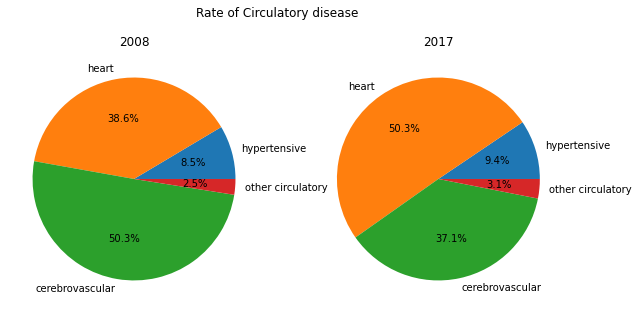

In [11]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(121)
ax.set_title("2008")
ax.pie(circulatory["2008"],labels=["hypertensive","heart","cerebrovascular","other circulatory"],
       autopct="%1.1f%%")  # 2008

ax = fig.add_subplot(122)
ax.set_title("2017")
ax.pie(circulatory["2017"],labels=["hypertensive","heart","cerebrovascular","other circulatory"],
       autopct="%1.1f%%")  # 2017

plt.suptitle("Rate of Circulatory disease")
plt.show()

You can see that the proportion of cerebrovascular disease has significantly decreased while that of heart disease has increased over the past 10 years.

### (4) Scatter plot
#### Correlation in the number of deaths between two respiratory diseases

Let's look at the correlation between two respiratory diseases, **heart disease** and **cerebrovascular disease,**  
using a scatter plot. We'll pass `kind = "scatter"` to `.plot()`.

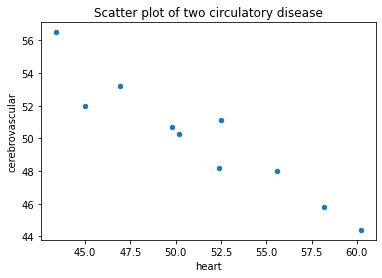

In [12]:
df.T.plot(x="heart",y="cerebrovascular",
        kind="scatter",
        title='Scatter plot of two circulatory disease')
plt.show()

It can be seen that the mortality rate from heart disease has increased while  cerebrovascular disease decreased.